In [2]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [3]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# 分類数設定

In [4]:
NUM_CLASSES = 5

# 学習データ読み込み

In [5]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [6]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [9]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dropout (Dropout)                    │ (None, 42)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 20)                  │             860 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5)                   │              55 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,125 (4.39 KB)

 Trainable params: 1,125 (4.39 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Specify the file path with the .keras extension
model_save_path = "model/keypoint_classifier/keypoint_classifier.keras"

# Create the ModelCheckpoint callback with the correct file path
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)


In [11]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [ ]:
# Define the EarlyStopping callback
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

# Now you can use both callbacks in the fit method
model.fit(
    X_train,
    y_train,
    epochs=300,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)


Epoch 1/300
1/3 ━━━━━━━━━━━━━━━━━━━━ 1s 949ms/step - accuracy: 0.0391 - loss: 2.0709
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - accuracy: 0.0609 - loss: 2.0072 - val_accuracy: 0.0000e+00 - val_loss: 1.7355
Epoch 2/300
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.0938 - loss: 1.8674
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.0963 - loss: 1.8905 - val_accuracy: 0.0550 - val_loss: 1.6774
Epoch 3/300
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.1172 - loss: 1.8342
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.1193 - loss: 1.8262 - val_accuracy: 0.3211 - val_loss: 1.6269
Epoch 4/300
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.1484 - loss: 1.8275
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.keras
3/3 ━━━━━

Epoch 25/300
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step - accuracy: 0.3672 - loss: 1.3450
Epoch 25: saving model to model/keypoint_classifier/keypoint_classifier.keras
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.3773 - loss: 1.3449 - val_accuracy: 0.4679 - val_loss: 1.2499
Epoch 26/300
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.3984 - loss: 1.3097
Epoch 26: saving model to model/keypoint_classifier/keypoint_classifier.keras
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4341 - loss: 1.3059 - val_accuracy: 0.4679 - val_loss: 1.2394
Epoch 27/300
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.4688 - loss: 1.2707
Epoch 27: saving model to model/keypoint_classifier/keypoint_classifier.keras
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4260 - loss: 1.3034 - val_accuracy: 0.4862 - val_loss: 1.2290
Epoch 28/300
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.4609 - loss: 1.2797
Epoch 28: saving model to model/keypoint_classifier/keypoint_classifier.keras
3/3 ━

Epoch 49/300
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.4922 - loss: 1.1504
Epoch 49: saving model to model/keypoint_classifier/keypoint_classifier.keras
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4936 - loss: 1.1517 - val_accuracy: 0.6422 - val_loss: 0.9765
Epoch 50/300
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5938 - loss: 1.0739
Epoch 50: saving model to model/keypoint_classifier/keypoint_classifier.keras
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5451 - loss: 1.1201 - val_accuracy: 0.6330 - val_loss: 0.9677
Epoch 51/300
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.4766 - loss: 1.1499
Epoch 51: saving model to model/keypoint_classifier/keypoint_classifier.keras
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5084 - loss: 1.1306 - val_accuracy: 0.6330 - val_loss: 0.9599
Epoch 52/300
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5469 - loss: 1.0546
Epoch 52: saving model to model/keypoint_classifier/keypoint_classifier.keras
3/3 ━━

Epoch 73/300
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5547 - loss: 1.0044
Epoch 73: saving model to model/keypoint_classifier/keypoint_classifier.keras
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5659 - loss: 0.9791 - val_accuracy: 0.7982 - val_loss: 0.7642
Epoch 74/300
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5547 - loss: 0.9688
Epoch 74: saving model to model/keypoint_classifier/keypoint_classifier.keras
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5707 - loss: 0.9679 - val_accuracy: 0.7982 - val_loss: 0.7568
Epoch 75/300
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6094 - loss: 0.9902
Epoch 75: saving model to model/keypoint_classifier/keypoint_classifier.keras
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6136 - loss: 0.9836 - val_accuracy: 0.7982 - val_loss: 0.7496
Epoch 76/300
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5469 - loss: 0.9747
Epoch 76: saving model to model/keypoint_classifier/keypoint_classifier.keras
3/3 ━━

Epoch 97/300
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7109 - loss: 0.8191
Epoch 97: saving model to model/keypoint_classifier/keypoint_classifier.keras
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6806 - loss: 0.8403 - val_accuracy: 0.9358 - val_loss: 0.5726
Epoch 98/300
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6406 - loss: 0.8486
Epoch 98: saving model to model/keypoint_classifier/keypoint_classifier.keras
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6353 - loss: 0.8503 - val_accuracy: 0.9358 - val_loss: 0.5661
Epoch 99/300
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7500 - loss: 0.7607
Epoch 99: saving model to model/keypoint_classifier/keypoint_classifier.keras
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7207 - loss: 0.8081 - val_accuracy: 0.9450 - val_loss: 0.5573
Epoch 100/300
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6484 - loss: 0.8875
Epoch 100: saving model to model/keypoint_classifier/keypoint_classifier.keras
3/3 

Epoch 121/300
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7891 - loss: 0.6738
Epoch 121: saving model to model/keypoint_classifier/keypoint_classifier.keras
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7606 - loss: 0.7124 - val_accuracy: 0.9633 - val_loss: 0.4389
Epoch 122/300
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.7969 - loss: 0.6594
Epoch 122: saving model to model/keypoint_classifier/keypoint_classifier.keras
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7598 - loss: 0.7009 - val_accuracy: 0.9541 - val_loss: 0.4355
Epoch 123/300
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6797 - loss: 0.7943
Epoch 123: saving model to model/keypoint_classifier/keypoint_classifier.keras
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7020 - loss: 0.7773 - val_accuracy: 0.9633 - val_loss: 0.4292
Epoch 124/300
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7422 - loss: 0.7339
Epoch 124: saving model to model/keypoint_classifier/keypoint_classifier.kera

Epoch 145/300
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7422 - loss: 0.6478
Epoch 145: saving model to model/keypoint_classifier/keypoint_classifier.keras
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7475 - loss: 0.6471 - val_accuracy: 1.0000 - val_loss: 0.3188
Epoch 146/300
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7031 - loss: 0.7092
Epoch 146: saving model to model/keypoint_classifier/keypoint_classifier.keras
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7571 - loss: 0.6482 - val_accuracy: 1.0000 - val_loss: 0.3154
Epoch 147/300
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7109 - loss: 0.7315
Epoch 147: saving model to model/keypoint_classifier/keypoint_classifier.keras
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7549 - loss: 0.6839 - val_accuracy: 0.9908 - val_loss: 0.3128
Epoch 148/300
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7188 - loss: 0.6737
Epoch 148: saving model to model/keypoint_classifier/keypoint_classifier.kera

Epoch 169/300
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8047 - loss: 0.5457
Epoch 169: saving model to model/keypoint_classifier/keypoint_classifier.keras
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7929 - loss: 0.5636 - val_accuracy: 1.0000 - val_loss: 0.2550
Epoch 170/300
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7578 - loss: 0.5961
Epoch 170: saving model to model/keypoint_classifier/keypoint_classifier.keras
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7595 - loss: 0.6122 - val_accuracy: 1.0000 - val_loss: 0.2496
Epoch 171/300
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8047 - loss: 0.5861
Epoch 171: saving model to model/keypoint_classifier/keypoint_classifier.keras
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.8051 - loss: 0.5775 - val_accuracy: 1.0000 - val_loss: 0.2427
Epoch 172/300
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.8047 - loss: 0.5926
Epoch 172: saving model to model/keypoint_classifier/keypoint_classifier.kera

In [ ]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

In [ ]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [ ]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

# 混同行列

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


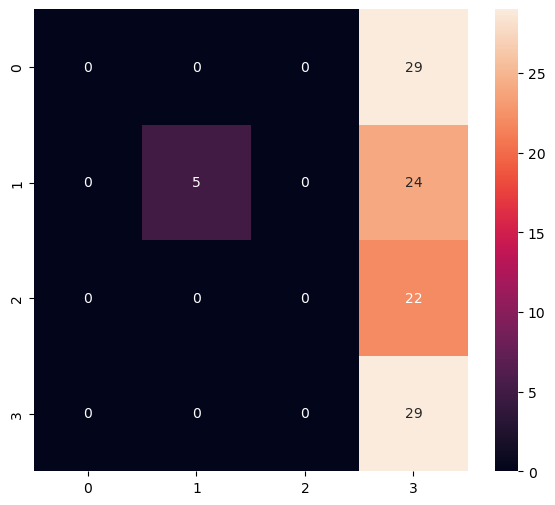

Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        29
           1       1.00      0.17      0.29        29
           2       0.00      0.00      0.00        22
           3       0.28      1.00      0.44        29

    accuracy                           0.31       109
   macro avg       0.32      0.29      0.18       109
weighted avg       0.34      0.31      0.19       109



C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [15]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [ ]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\Admin\AppData\Local\Temp\tmpmgyn2odl\assets


INFO:tensorflow:Assets written to: C:\Users\Admin\AppData\Local\Temp\tmpmgyn2odl\assets


# 推論テスト

In [ ]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [ ]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [ ]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [ ]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

In [ ]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))